<a href="https://colab.research.google.com/github/Rogerio-mack/LP2_2024S1/blob/main/LP2_Zipf_Law_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zipf Law**

O exemplo mais conhecido da lei de Zipf aplica-se à tabela de frequência de palavras em um texto ou corpus de linguagem natural:

$$\text{word frequency} \propto \frac{1}{\text{word rank}}$$

Geralmente verifica-se que a palavra mais comum ocorre aproximadamente duas vezes mais que a próxima palavra comum, três vezes mais que a terceira mais comum e assim por diante. Isto é, é uma distrbuição exponencial.

O que é mais interessante é que isso é uma *lei universal* para os textos produzidos pelo ser humano, isso se aplica a qualquer texto,
um livro, uma revista ou um conjunto de páginas Web, mesmo se estiver em português, alemão, espanhol ou inglês (ao menos com a linhas que tem essa estrutura de palavras). Veja a demonstração disso aqui [Zipf's Law Applied to Word and Letter Frequencies
](https://www.wolframcloud.com/objects/demonstrations/ZipfsLawAppliedToWordAndLetterFrequencies-source.nb).


Por exemplo, a coleção de textos conhecida como *Brown Corpus* do inglês americano (uma grande coleção eletrônica de amostras de texto do inglês americano atual de gêneros variados), a palavra " the" é a palavra que ocorre com mais frequência. Fiel à Lei de Zipf, a palavra em segundo lugar "de" representa pouco mais de 3,5% das palavras, seguida por "e" etc. E algo semelhante vai ocorrer em uma coleção de texto do NYT ou em obras de Sheakspeare. Isso é frequentemente representado da seguinte forma, chamada lei de Zipf-Mandelbrot :

$$\text{frequency} \propto \frac{1}{(\text{rank} + b)^a}$$

O mesmo vai ocorrer com as palavras (têrmos) mais frenquentes em português, "o" "a", depois "de" etc. e o mesmo compartamento sendo encontrado em uma obra de Machado de Assis, o semanário da Folha de São Paulo ou a coleção de páginas da Wikipedia em português.

Referências: https://en.wikipedia.org/wiki/Zipf%27s_law.

<br>
<br>

## **Atividade Complementar do Projeto**

**Assim, é esperado que o seu programa em C que extraiu as quantidades de palavras de um texto, apresente a mesma distribuição. Substitua o dicionário empregado nesta demonstração e veja o resultado para o texto e dicionário que você criou (empregue um texto com mais de 5000 palavras, há algumas sugestões ao final deste notebook). Basta empregar neste código o seu dicionário onde é indicado abaixo. Poste o resultado, a figura final, junto com o seu projeto.**


# **Dicionário de Têrmos**

Aqui criamos um arquivo texto extraído da biografia da atriz **Kate Beckinsale** na Wikipedia e em seguida criamos um dicionário com a quantidade de palavras, à exemplo do que você criou para o seu projeto. Você só vai precisar substituir o dicionário mais adiante (não vai empregar o seu arquivo texto).

<br>
<br>

<img src="https://meusite.mackenzie.br/rogerio/kate_beckinsale.png" width=300, align="left">

<br>
<br>
<br>
<br>


In [ ]:
#@markdown **Web Scrapping, para gerar o arquivo dessa demo**
import requests
from bs4 import BeautifulSoup

url = 'https://pt.wikipedia.org/wiki/Kate_Beckinsale'

response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    main_content = soup.find('div', {'class': 'mw-parser-output'})

    text = []

    for paragraph in main_content.find_all(['p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6']):
        text.append(paragraph.get_text())

    for line in text:
       None
       # print(line)

else:
    print(f'Falha ao acessar a página. Response: {response.status_code}')

for i in range(len(text)):
    text[i] = text[i].lower() # para unicidade
    text[i] = text[i].replace('\n','')
    text[i] = text[i].replace('.','')
    text[i] = text[i].replace(',','')
    text[i] = text[i].replace('(','')
    text[i] = text[i].replace(')','')
    text[i] = text[i].replace('?','')
    text[i] = text[i].replace('\'','') # elimina ' e "

print(text)

['kathrin romany beckinsale chiswick 26 de julho de 1973 é uma atriz britânica depois de alguns papéis menores na televisão ela estreou no cinema em much ado about nothing 1993 enquanto ainda era estudante na universidade de oxford ela apareceu em dramas britânicos como prince of jutland 1994 cold comfort farm 1995 emma 1996 e the golden bowl 2000 além de várias produções teatrais e de rádio começou a procurar trabalhos cinematográficos nos estados unidos no final dos anos 90 e depois de aparecer em dramas de pequena escala os últimos dias de disco 1998 e brokedown palace 1999 ela teve papéis principais no drama de guerra pearl harbor 2001 na comédia romântica serendipity e tiptoes 2003 ela seguiu aqueles com aparições em the aviator 2004 e click 2006', 'desde que foi escalada como selene na série de filmes underworld 2003–2016 beckinsale tornou-se conhecida principalmente por seu trabalho em filmes de ação incluindo van helsing 2004 whiteout 2009 contraband 2012 e total recall 2012 el

In [ ]:
#@markdown **Cria um dicionário igual ao que você criou no seu projeto**

mydict = {}                             # crie um dicionário vazio

for line in text:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

# print(list(mydict.items())[:100])         # First 100

import pandas as pd
df = pd.DataFrame(mydict.items(),  columns=['word', 'count'])
df.loc[len(df),['word','count']] = ['Total de Palavras diferentes no dicionário',df['count'].sum()]

df.to_csv('my_dictionary.csv',index=None,header=None)
print(df)




                                            word   count
0                                        kathrin     2.0
1                                         romany     1.0
2                                     beckinsale    75.0
3                                       chiswick     2.0
4                                             26     2.0
...                                          ...     ...
1636                               cinema[editar     1.0
1637                                 referências     1.0
1638                                    ligações     1.0
1639                             externas[editar     1.0
1640  Total de Palavras diferentes no dicionário  4275.0

[1641 rows x 2 columns]


# **Substitua aqui pelo seu dicionário**

In [ ]:
import pandas as pd

df = pd.read_csv('my_dictionary.csv',header=None,names=['word','count'])

df = df.sort_values('count',ascending=False)
display(df.head(1))

df = df.iloc[1::].reset_index(drop=True)
df.head()

,word,count
1640,Total de Palavras diferentes no dicionário,4275.0


,word,count
0,de,232.0
1,em,125.0
2,e,108.0
3,o,101.0
4,que,88.0


# **Gera Gráfico da Distribuição das Palavras**

Salve a figura e poste junto com seu projeto no Moodle.

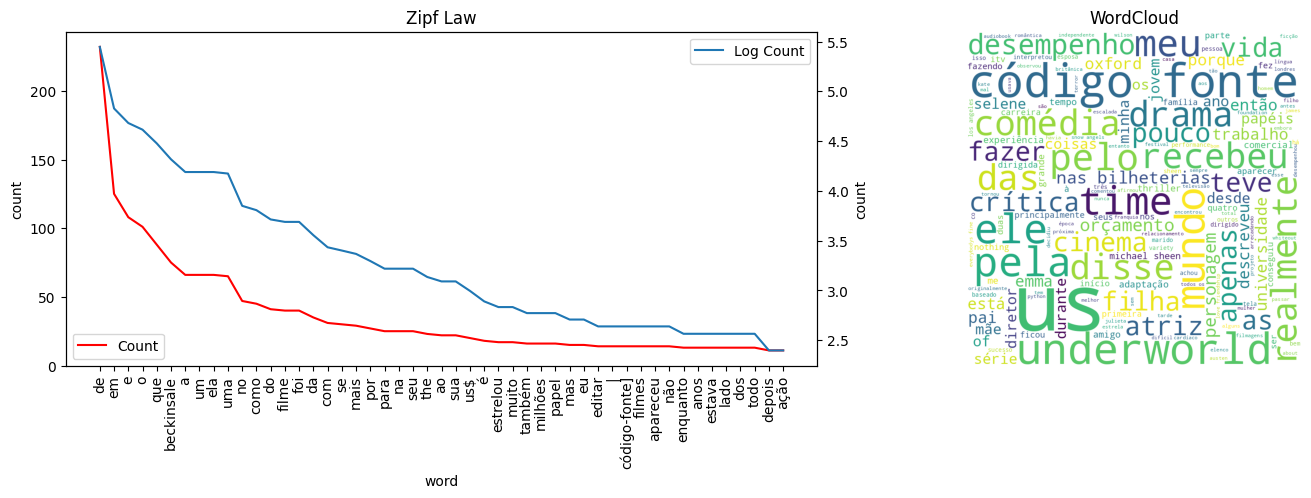

In [ ]:
#@markdown **Gera gráfico**
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from google.colab import files
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(15,4))

sns.lineplot(x=df[df['count'] > 10].word,y=df[df['count'] > 10]['count'],ax=ax[0],color='r',label='Count')
ax2 = ax[0].twinx()
sns.lineplot(x=df[df['count'] > 10].word,y=np.log(df[df['count'] > 10]['count']),ax=ax2,label='Log Count')
ax[0].legend(loc='lower left')
ax2.legend()
ax[0].set_title('Zipf Law')

stopwords = set(df.word.head( 60 ))
texto_string = ''

for line in text:
  texto_string = texto_string + ' ' + line.lower()

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(texto_string)

# plot the WordCloud image
ax[1].imshow(wordcloud)
ax[1].axis("off")
ax[1].set_title('WordCloud')

plt.tight_layout(pad = 0)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)

plt.show()




In [ ]:
#@markdown **Quer salvar esta figura?**

answer = input("Deseja salvar a figura em em arquivo (S/N)?")
if answer == "S":
  fig.savefig('my_figure.png')
  files.download('my_figure.png')

Deseja salvar a figura em em arquivo (S/N)?S


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Sugestão de Arquivos Textos

Se quiser, você pode empregar outros textos aqui ou com o seu programa em C, e abaixo tem um código de como extrair textos de domínio público de grandes obras, como  

In [ ]:
import urllib.request  # the lib that handles the url stuff

text = []

# Dom Casmurro, Machado de Assis
# https://www.gutenberg.org/cache/epub/55752/pg55752.txt

# Moby-Dick, Hermann Melville
# https://www.gutenberg.org/files/15/15-0.txt

# Ulysses, James Joyce
# https://www.gutenberg.org/files/4300/4300-0.txt

# etc.

for line in urllib.request.urlopen('https://www.gutenberg.org/cache/epub/55752/pg55752.txt'):
#   print(line.decode('utf-8')) #utf-8 or iso8859-1 or whatever the page encoding scheme is
    text.append(line.decode('utf-8'))

for line in text:
   print(line)

A saída de streaming foi truncada nas últimas 5000 linhas.




CVIII



Um filho.



Pois nem todo isso me matava a sède de um filho, um triste menino

que fosse, amarello e magro, mas um filho, um filho proprio da minha

pessoa. Quando iamos a Andarahy e viamos a filha de Escobar e Sancha,

familiarmente Capitúsinha, por differençal-a de minha mulher, visto

que lhe deram o mesmo nome á pia, ficavamos cheios de invejas. A

pequena era graciosa e gorducha, faladeira e curiosa. Os paes, como

os outros paes, contavam as travessuras e agudezas da menina, e nós,

quando voltavamos á noite para a Gloria, vinhamos suspirando as nossas

invejas, e pedindo mentalmente ao ceu que nol-as matassem...



... As invejas morreram, as esperanças nasceram, e não tardou que

viesse ao mundo o fructo dellas. Não era escasso nem feio, como eu já

pedia, mas um rapagão robusto e lindo.



A minha alegria quando elle nasceu, não sei dizel-a; nunca a tive

egual, nem creio que a possa haver identica, ou qu

## Luhn e Zipf Law e Ciência de Dados

A frequência de termos (quantidade que cada palavra aparece em um texto) tem grande importância em uma série de problemas envolvendo busca, classificação e sumarização automática de documentos.  

As palavras que um texto contêm e a frequencia delas pode muito bem dar uma pista do conteúdo do texto  

> Hans Peter Luhn (1957): **The weight of a term that occurs in a document is simply proportional to the term frequency**.

Entretanto parecem haver termos muito frequentes, como artigos, preposições etc. que parecem contribuir muito pouco para explicar o conteúdo de um texto.

> George Kingsley Zipf: **Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number n has a frequency proportional to 1/n.**

Isso ocorre em todo o texto de produção humana e, importante, em *qualquer língua*. Esse princípio é empregado desde para decifrar códigos e texto em linguas antigas, como em modernos sistemas de mineração de texto (*search engines*, bibliotecas digitais, classificação automática de conteúdo etc.).

Veja alguns textos famosos em diferentes línguas:  

In [ ]:
from IPython.display import IFrame
IFrame('https://demonstrations.wolfram.com/ZipfsLawAppliedToWordAndLetterFrequencies/', width='1000', height=600)